# See also
https://towardsdatascience.com/sentiment-analysis-in-10-minutes-with-bert-and-hugging-face-294e8a04b671
https://colab.research.google.com/drive/1lmpHiionwn7Ah7eSujOMGnlY5nrr8IVb#scrollTo=-KzJheBt5e4H

In [1]:
from transformers import BertTokenizer
import tensorflow as tf

In [2]:
model = tf.keras.models.load_model('MLModel/Bertiment')
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

In [3]:
model.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (Custom>TFBertMainLaye  multiple                 109482240 
 r)                                                              
                                                                 
 dropout_37 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
Total params: 109,483,778
Trainable params: 109,483,778
Non-trainable params: 0
_________________________________________________________________


In [8]:
import pandas as pd

In [ ]:
df = pd.read_csv('htmlTitles.tsv', sep='\t', header=0)
df = df.fillna('replaced all characters')
df[df.isna().any(axis=1)]
titles = df.values.tolist()

In [ ]:
step = 100
for i in range(0,23200,step):
  print(i)
  print(min(len(titles),i+step))
  tf_batch = tokenizer([row[1] for row in titles[i:min(len(titles),i+step)]], max_length=128,
                      padding=True, truncation=True, return_tensors='tf')
  tf_outputs = model(tf_batch)
  tf_predictions = tf.nn.softmax(tf_outputs[0], axis=-1)
  labels = ['Negative', 'Positive']
  label = tf.argmax(tf_predictions, axis=1)
  label = label.numpy()
  for j in range(i,min(len(titles),i+step)):
    titles[j].append(labels[label[j-i]])
    #print(titles[j], ": \n", labels[label[j-i]])

In [ ]:
df = pd.DataFrame(titles, columns = ["id", "title", "stance"])
print(df)
df.to_csv('htmlTitlesStance.tsv', sep='\t', index=False)

In [12]:
import pandas as pd
df = pd.read_csv('htmlTitlesStanceNEW.tsv', sep='\t', header=0)
afinnDf = pd.read_csv('afinnSentimentNEW.tsv', sep='\t', header=0)

In [13]:
df['stance'].value_counts()

Positive    13882
Negative     9318
Name: stance, dtype: int64

In [8]:
print(sum(n > 0 for n in afinnDf['AFINN']),
      sum(n < 0 for n in afinnDf['AFINN']),
      sum(n == 0 for n in afinnDf['AFINN']))


14862 6580 1731


In [1]:
from IPython.display import Image
from code_evaluations import define 
path_to_images = define.imagePath()

In [8]:
path_to_images = 'data/images/'

Headline:  Best Option for Deep Concealment: Small Autos or Revolvers? - USA Carry 
Stance:  Positive


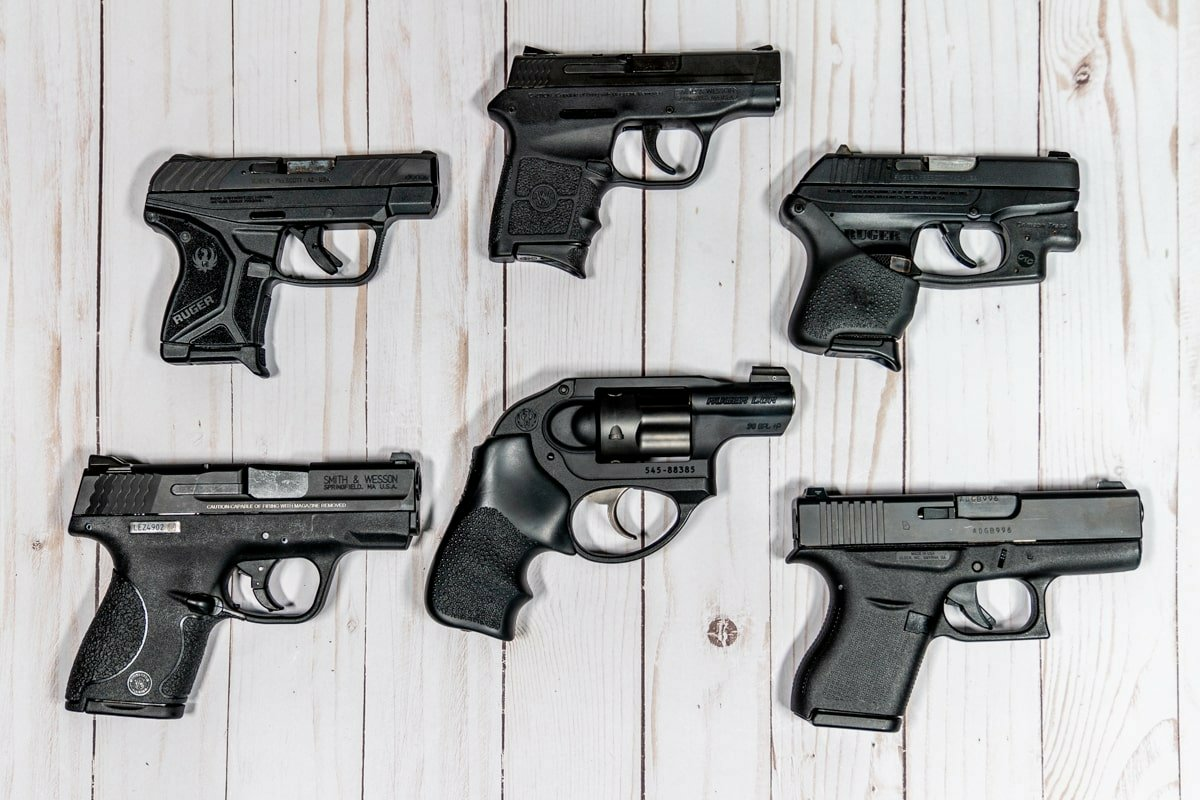

In [42]:
samp = df.sample(1).values[0]
print("Headline: ", samp[1], "\nStance: ", samp[2])
dir = path_to_images + samp[0][0:3] + "/" + samp[0]
Image(filename= dir + '/image.png') 

In [33]:
samp[0][0:4]

'I8b0'